In [1]:
%matplotlib inline
import sys                                 
import os                                  
import numpy as np                         
import matplotlib.pyplot as plt            
from matplotlib.backends.backend_pdf import PdfPages                                   
                                           
caffe_root = os.environ["CAFFE_ROOT"]      
os.chdir(caffe_root)                       
print caffe_root                           
sys.path.insert(0, caffe_root + 'python')  
import caffe                               

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 21 days
Vendor:  Continuum Analytics, Inc.


/home/maohz12/pruning/


Package: mkl
Message: trial mode expires in 21 days


In [2]:
prototxt = '/home/maohz12/pruning/3_prototxt_solver/L2/train_val.prototxt'             
caffemodel = '/home/maohz12/pruning/4_model_checkpoint/alexnet/alexnet9x.caffemodel'                                                 
                                                                                          
net = caffe.Net(prototxt, caffemodel, caffe.TEST)                                         

conv1


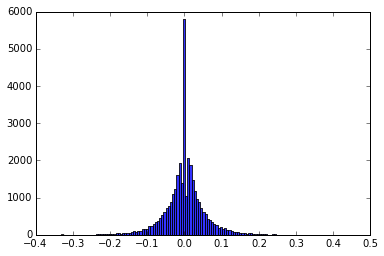

conv2


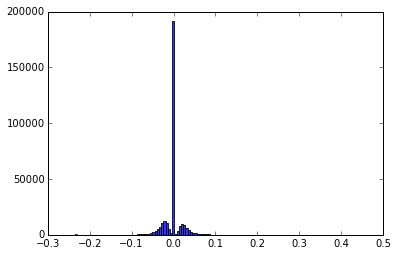

conv3


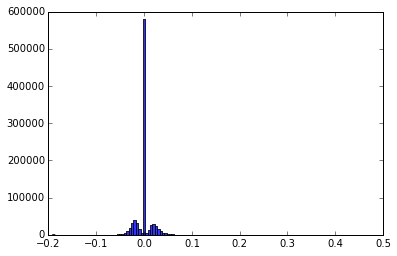

conv4


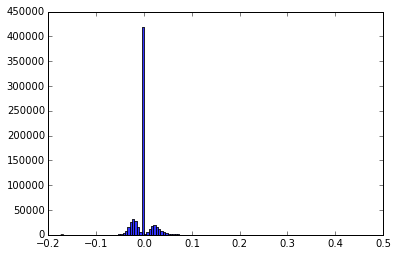

conv5


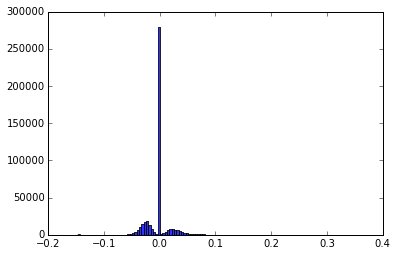

fc6


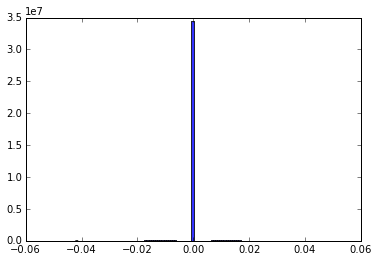

fc7


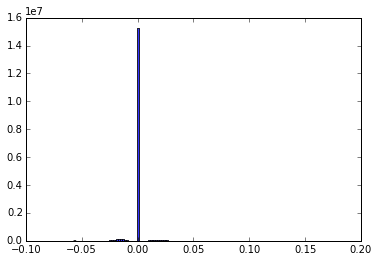

fc8


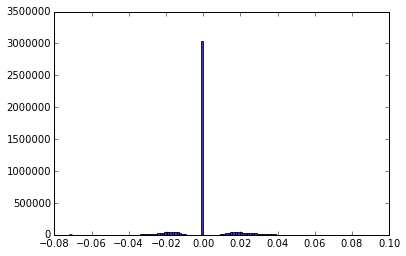

In [3]:
layers = filter(lambda x:'conv' in x or 'fc' in x, net.params.keys())
for i,layer in enumerate(layers):
    W = net.params[layer][0].data                                                            
    numBins = 128       
    
    print layer
    plt.hist(W.flatten(), numBins, color='blue', alpha=0.8) 
    plt.show()         

In [32]:
y_interc

array([ 0.05 ,  0.175,  0.3  ,  0.425,  0.55 ,  0.675,  0.8  ,  0.925])

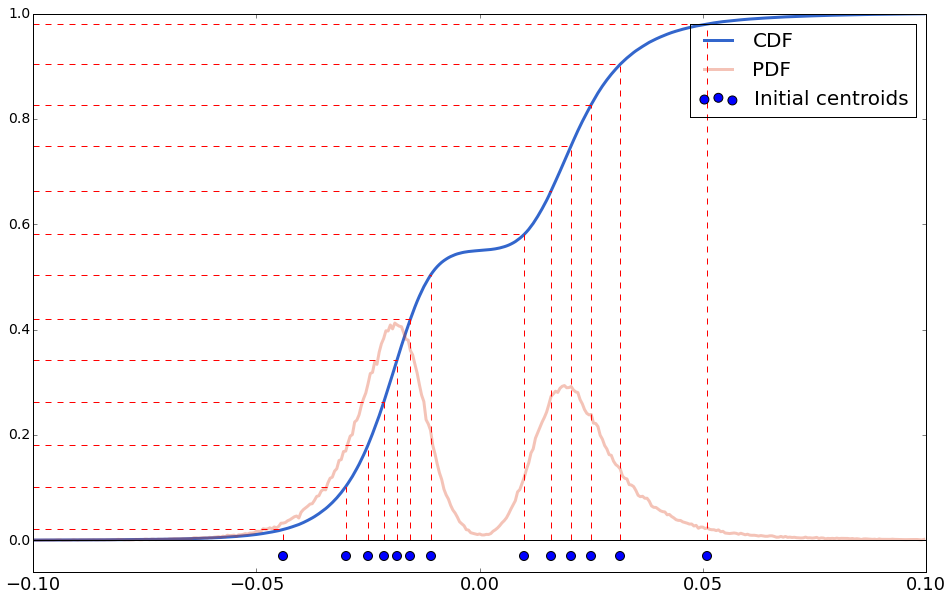

In [82]:
layer = 'conv3'
range_t = np.arange(-0.1, 0.1, 0.0005)
data = net.params[layer][0].data.flatten()
nonzero = data[data != 0]
pdf = np.array(map(lambda x: np.where(nonzero < x)[0].size, range_t), dtype=np.float32)

pdf = pdf / np.max(pdf)
cdf = (pdf[1:] - pdf[:-1]) * 30    

pp = PdfPages('pdf_cdf.pdf') 
fig=plt.figure(figsize=(16,10)) 
ax = fig.add_subplot(1,1,1)

y_interc = np.arange(0.02,1,0.08)
x_interc = np.array(map(lambda x:np.where(pdf < x)[0].size, y_interc))
plt.ylim(-0.06,1)
plt.xlim(-0.1,0.1)
line1, =ax.plot(range_t,pdf, color='#3366CC',lw=3)
line2, =ax.plot(range_t[1:],cdf, color='#DC3912', alpha=0.3,lw=3)


for idx in range(len(y_interc)):
    ax.plot([-0.1, range_t[x_interc[idx]]], [pdf[x_interc[idx]], pdf[x_interc[idx]]], c='r',ls='--')
    ax.plot([range_t[x_interc[idx]], range_t[x_interc[idx]]], [0, pdf[x_interc[idx]]], c='r',ls='--')
ax.plot([-0.1, 0.1], [0,0], color='black')
mark = ax.scatter(range_t[x_interc], np.zeros(x_interc.shape)-0.03, marker='o', s=80, c='b')
ax.legend([line1, line2, mark],['CDF','PDF', 'Initial centroids'], fontsize=20)
# plt.xlabel('Number of BBoxs',fontsize=20)
# plt.ylabel('network running time(s)',fontsize=20)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(18) 
    # specify integer or one of preset strings, e.g.
    #tick.label.set_fontsize('x-small') 
for tick in ax.yaxis.get_major_ticks():  
    tick.label.set_fontsize(14) 
    
plt.savefig(pp, format='pdf')
pp.close()
plt.show()

In [34]:
pdf[x_interc-1]

array([ 0.0400309 ,  0.16179946,  0.24900332,  0.40828899,  0.54891104,
        0.66340661,  0.77794468,  0.92320156], dtype=float32)